Trabalho 2

Bibliotecas

In [72]:
import numpy as np
import matplotlib.pyplot as plt

Parâmetros do problema

In [73]:
D = 1.0  # Coeficiente de difusão
ka = 1.0  # Parâmetro ka
kb = 1.0  # Parâmetro kb
L = 1.0  # Comprimento L
Lf = 1.0  # Comprimento Lf
CE = 1.0  # Concentração na fronteira x=0
N = 100  # Número de pontos de grade

Função para resolver o problema de uma dimensão

In [74]:
def difusao_1d(D, ka, kb, L, Lf, CE, N):
    # Discretização do domínio
    dx = (L + Lf) / (N - 1)
    x = np.linspace(0, L + Lf, N)

    # Matriz de coeficientes e vetor de termos constantes
    A = np.zeros((N, N))
    b = np.zeros(N)

    # Preenchimento da matriz A e do vetor b
    for i in range(1, N-1):
        if x[i] < L:
            A[i, i-1] = D / dx**2
            A[i, i] = -2 * D / dx**2 - ka
            A[i, i+1] = D / dx**2
        else:
            A[i, i-1] = D / dx**2
            A[i, i] = -2 * D / dx**2 - kb
            A[i, i+1] = D / dx**2

    # Condições de contorno
    A[0, 0] = 1.0
    b[0] = CE
    A[-1, -2] = -1.0 / dx
    A[-1, -1] = 1.0 / dx

    # Resolução do sistema linear
    return np.linalg.solve(A, b), x

Obtem a resolução do sistema linear e o dominio de dimensão

In [75]:
C, x = difusao_1d(D, ka, kb, L, Lf, CE, N)

C

array([1.        , 0.98074237, 0.961885  , 0.9434202 , 0.92534043,
       0.90763831, 0.89030662, 0.87333828, 0.85672637, 0.84046411,
       0.82454486, 0.80896212, 0.79370954, 0.77878089, 0.76417008,
       0.74987114, 0.73587824, 0.72218566, 0.70878783, 0.69567927,
       0.68285463, 0.67030868, 0.65803629, 0.64603247, 0.6342923 ,
       0.622811  , 0.61158389, 0.60060637, 0.58987398, 0.57938232,
       0.56912713, 0.55910421, 0.54930947, 0.53973891, 0.53038864,
       0.52125482, 0.51233375, 0.50362176, 0.49511532, 0.48681094,
       0.47870525, 0.47079492, 0.46307673, 0.45554754, 0.44820426,
       0.44104391, 0.43406355, 0.42726035, 0.42063152, 0.41417435,
       0.40788623, 0.40176457, 0.39580687, 0.39001072, 0.38437374,
       0.37889363, 0.37356815, 0.36839513, 0.36337247, 0.3584981 ,
       0.35377005, 0.34918638, 0.34474521, 0.34044475, 0.33628323,
       0.33225895, 0.32837027, 0.32461561, 0.32099344, 0.31750226,
       0.31414067, 0.31090728, 0.30780078, 0.30481991, 0.30196

Plota a solução

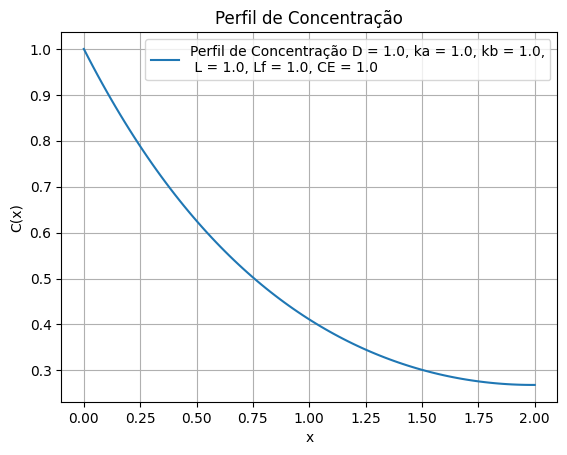

In [76]:
plt.plot(x, C, label='Perfil de Concentração D = ' + str(D) + ', ka = ' + str(ka) + ', kb = ' + str(kb) + ',\n L = ' + str(L) + ', Lf = ' + str(Lf) + ', CE = ' + str(CE))
plt.xlabel('x')
plt.ylabel('C(x)')
plt.grid()
titulo = 'Perfil de Concentração'
plt.title(titulo)
plt.legend()
# plt.show()
plt.savefig('docs/img/trab2/'+titulo+'.png')

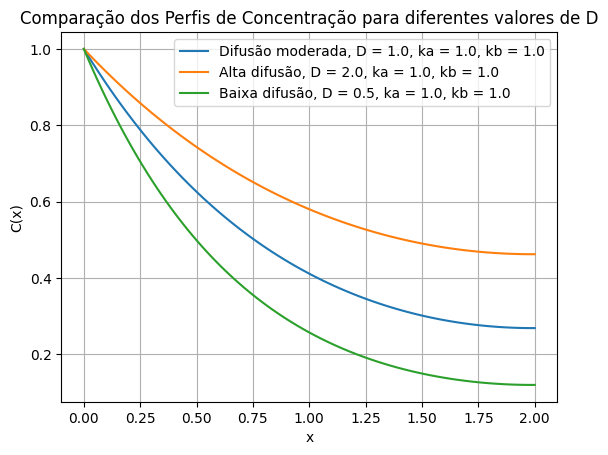

In [77]:
# Parâmetros do problema
D = 1.0  # Coeficiente de difusão
ka = 1.0  # Parâmetro ka
kb = 1.0  # Parâmetro kb
L = 1.0  # Comprimento L
Lf = 1.0  # Comprimento Lf
CE = 1.0  # Concentração na fronteira x=0
N = 100  # Número de pontos de grade
C, x = difusao_1d(D, ka, kb, L, Lf, CE, N)
plt.plot(x, C, label=f'Difusão moderada, D = {D}, ka = {ka}, kb = {kb}')

D = 2.0
C, x = difusao_1d(D, ka, kb, L, Lf, CE, N)
plt.plot(x, C, label=f'Alta difusão, D = {D}, ka = {ka}, kb = {kb}')

D = 0.5
C, x = difusao_1d(D, ka, kb, L, Lf, CE, N)
plt.plot(x, C, label=f'Baixa difusão, D = {D}, ka = {ka}, kb = {kb}')

plt.xlabel('x')
plt.ylabel('C(x)')
plt.grid()
titulo = 'Comparação dos Perfis de Concentração para diferentes valores de D'
plt.title(titulo)
plt.legend()
# plt.show()
plt.savefig('docs/img/trab2/'+titulo+'.png')

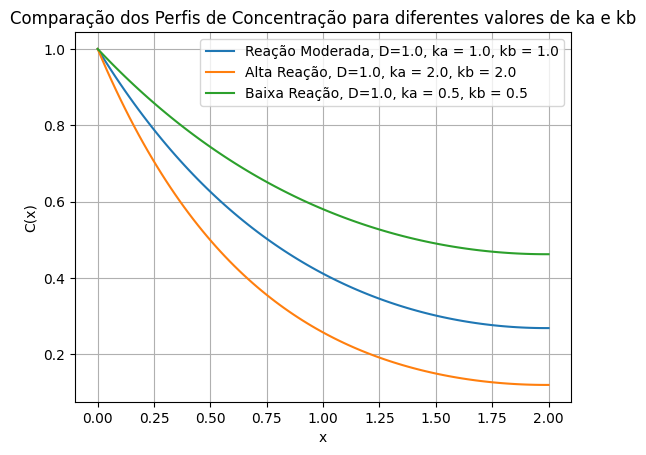

In [78]:
# Parâmetros do problema
D = 1.0  # Coeficiente de difusão
ka = 1.0  # Parâmetro ka
kb = 1.0  # Parâmetro kb
L = 1.0  # Comprimento L
Lf = 1.0  # Comprimento Lf
CE = 1.0  # Concentração na fronteira x=0
N = 100  # Número de pontos de grade
C, x = difusao_1d(D, ka, kb, L, Lf, CE, N)
plt.plot(x, C, label=f'Reação Moderada, D={D}, ka = {ka}, kb = {kb}')

ka = 2.0
kb = 2.0
C, x = difusao_1d(D, ka, kb, L, Lf, CE, N)
plt.plot(x, C, label=f'Alta Reação, D={D}, ka = {ka}, kb = {kb}')

ka = 0.5
kb = 0.5
C, x = difusao_1d(D, ka, kb, L, Lf, CE, N)
plt.plot(x, C, label=f'Baixa Reação, D={D}, ka = {ka}, kb = {kb}')

plt.xlabel('x')
plt.ylabel('C(x)')
plt.grid()
titulo = 'Comparação dos Perfis de Concentração para diferentes valores de ka e kb'
plt.title(titulo)
plt.legend()
# plt.show()
plt.savefig('docs/img/trab2/'+titulo+'.png')


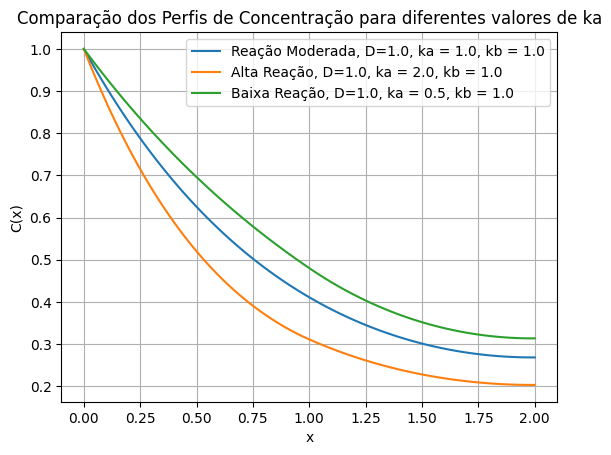

In [81]:
# Parâmetros do problema
D = 1.0  # Coeficiente de difusão
ka = 1.0  # Parâmetro ka
kb = 1.0  # Parâmetro kb
L = 1.0  # Comprimento L
Lf = 1.0  # Comprimento Lf
CE = 1.0  # Concentração na fronteira x=0
N = 100  # Número de pontos de grade
C, x = difusao_1d(D, ka, kb, L, Lf, CE, N)
plt.plot(x, C, label=f'Reação Moderada, D={D}, ka = {ka}, kb = {kb}')

ka = 2.0
kb = 1.0
C, x = difusao_1d(D, ka, kb, L, Lf, CE, N)
plt.plot(x, C, label=f'Alta Reação, D={D}, ka = {ka}, kb = {kb}')

ka = 0.5
kb = 1.0
C, x = difusao_1d(D, ka, kb, L, Lf, CE, N)
plt.plot(x, C, label=f'Baixa Reação, D={D}, ka = {ka}, kb = {kb}')

plt.xlabel('x')
plt.ylabel('C(x)')
plt.grid()
titulo = 'Comparação dos Perfis de Concentração para diferentes valores de ka'
plt.title(titulo)
plt.legend()
# plt.show()
plt.savefig('docs/img/trab2/'+titulo+'.png')

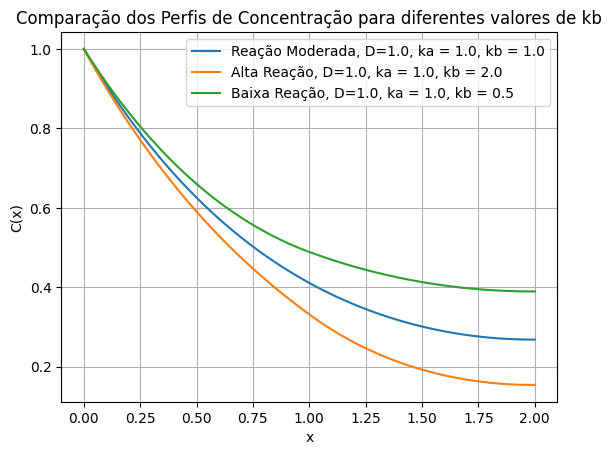

In [80]:
# Parâmetros do problema
D = 1.0  # Coeficiente de difusão
ka = 1.0  # Parâmetro ka
kb = 1.0  # Parâmetro kb
L = 1.0  # Comprimento L
Lf = 1.0  # Comprimento Lf
CE = 1.0  # Concentração na fronteira x=0
N = 100  # Número de pontos de grade
C, x = difusao_1d(D, ka, kb, L, Lf, CE, N)
plt.plot(x, C, label=f'Reação Moderada, D={D}, ka = {ka}, kb = {kb}')

ka = 1.0
kb = 2.0
C, x = difusao_1d(D, ka, kb, L, Lf, CE, N)
plt.plot(x, C, label=f'Alta Reação, D={D}, ka = {ka}, kb = {kb}')

ka = 1.0
kb = 0.5
C, x = difusao_1d(D, ka, kb, L, Lf, CE, N)
plt.plot(x, C, label=f'Baixa Reação, D={D}, ka = {ka}, kb = {kb}')

plt.xlabel('x')
plt.ylabel('C(x)')
plt.grid()
titulo = 'Comparação dos Perfis de Concentração para diferentes valores de kb'
plt.title(titulo)
plt.legend()
# plt.show()
plt.savefig('docs/img/trab2/'+titulo+'.png')